In [23]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/MyDrive')
!ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
 char-tot-png-4645		        robotic
 checking-blur			        saved_model.model
 keras-covid-19			        sharp-900images
'keras load model.ipynb'	        tensorflow-mnist-master
'old run of deblur-gan'		        test
 opencv-super-resolution	        TF-ESPCN-master
 paper				       'training GAN'
 Pytorch-Image-Deblurring-master-run7  'train python'


In [11]:
# USAGE
# python load_model.py --images malaria/testing --model saved_model.model

# import the necessary packages
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from imutils import build_montages
from imutils import paths
import numpy as np
import argparse
import random
import cv2

In [24]:
# load the pre-trained network
print("[INFO] loading pre-trained network...")
model = load_model("saved_model.model")

[INFO] loading pre-trained network...


In [25]:
# grab all image paths in the input directory and randomly sample them
imagePaths = list(paths.list_images("test"))
random.shuffle(imagePaths)
imagePaths = imagePaths[:16]

In [26]:
# initialize our list of results
results = []

In [27]:
# loop over our sampled image paths
for p in imagePaths:
# load our original input image
	orig = cv2.imread(p)

# pre-process our image by converting it from BGR to RGB channel
# ordering (since our Keras mdoel was trained on RGB ordering),
# resize it to 64x64 pixels, and then scale the pixel intensities
# to the range [0, 1]
	image = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (64, 64))
	image = image.astype("float") / 255.0

	# order channel dimensions (channels-first or channels-last)
	# depending on our Keras backend, then add a batch dimension to
	# the image
	image = img_to_array(image)
	image = np.expand_dims(image, axis=0)

	# make predictions on the input image
	pred = model.predict(image)
	pred = pred.argmax(axis=1)[0]

	# an index of zero is the 'parasitized' label while an index of
	# one is the 'uninfected' label
	label = "Parasitized" if pred == 0 else "Uninfected"
	color = (0, 0, 255) if pred == 0 else (0, 255, 0)

	# resize our original input (so we can better visualize it) and
	# then draw the label on the image
	orig = cv2.resize(orig, (128, 128))
	cv2.putText(orig, label, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
		color, 2)

	# add the output image to our list of results
	results.append(orig)

In [28]:
# create a montage using 128x128 "tiles" with 4 rows and 4 columns
montage = build_montages(results, (128, 128), (4, 4))[0]

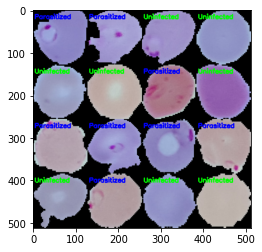

In [29]:
# show the output montage
import matplotlib.pyplot as plt
plt.imshow(montage)